# IMPORT PACKAGES

In [152]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# LOAD ODDS DATASET

In [153]:
odds_df = pd.read_csv("data/odds_2010_to_2025.csv")

odds_df.head()

,Team 1,Team 2,Odds 1,Odds 2,Year
0,Royal Challengers Bengaluru,Punjab Kings,1.90,1.91,2025
1,Mumbai Indians,Punjab Kings,1.68,2.20,2025
2,Gujarat Titans,Mumbai Indians,2.31,1.62,2025
3,Punjab Kings,Royal Challengers Bengaluru,1.97,1.84,2025
4,Lucknow Super Giants,Royal Challengers Bengaluru,2.23,1.66,2025


In [154]:
odds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1052 entries, 0 to 1051
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Team 1  1052 non-null   object 
 1   Team 2  1052 non-null   object 
 2   Odds 1  1052 non-null   float64
 3   Odds 2  1052 non-null   float64
 4   Year    1052 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 41.2+ KB


In [155]:
odds_df.describe()

,Odds 1,Odds 2,Year
count,1052.000000,1052.000000,1052.000000
mean,1.889439,1.973175,2017.624525
std,0.308024,0.304094,4.727059
min,1.250000,1.360000,2010.000000
25%,1.670000,1.737500,2013.000000
50%,1.835000,1.945000,2018.000000
75%,2.062500,2.170000,2022.000000
max,6.240000,3.750000,2025.000000


# YEARLY DISTRIBUTION OF ODDS 1 AND ODDS 2 (2010-2025)

/var/folders/kl/ts427k9d3bv9__2m52vxtk5c0000gn/T/ipykernel_6779/2742522274.py:29: UserWarning:

The figure layout has changed to tight



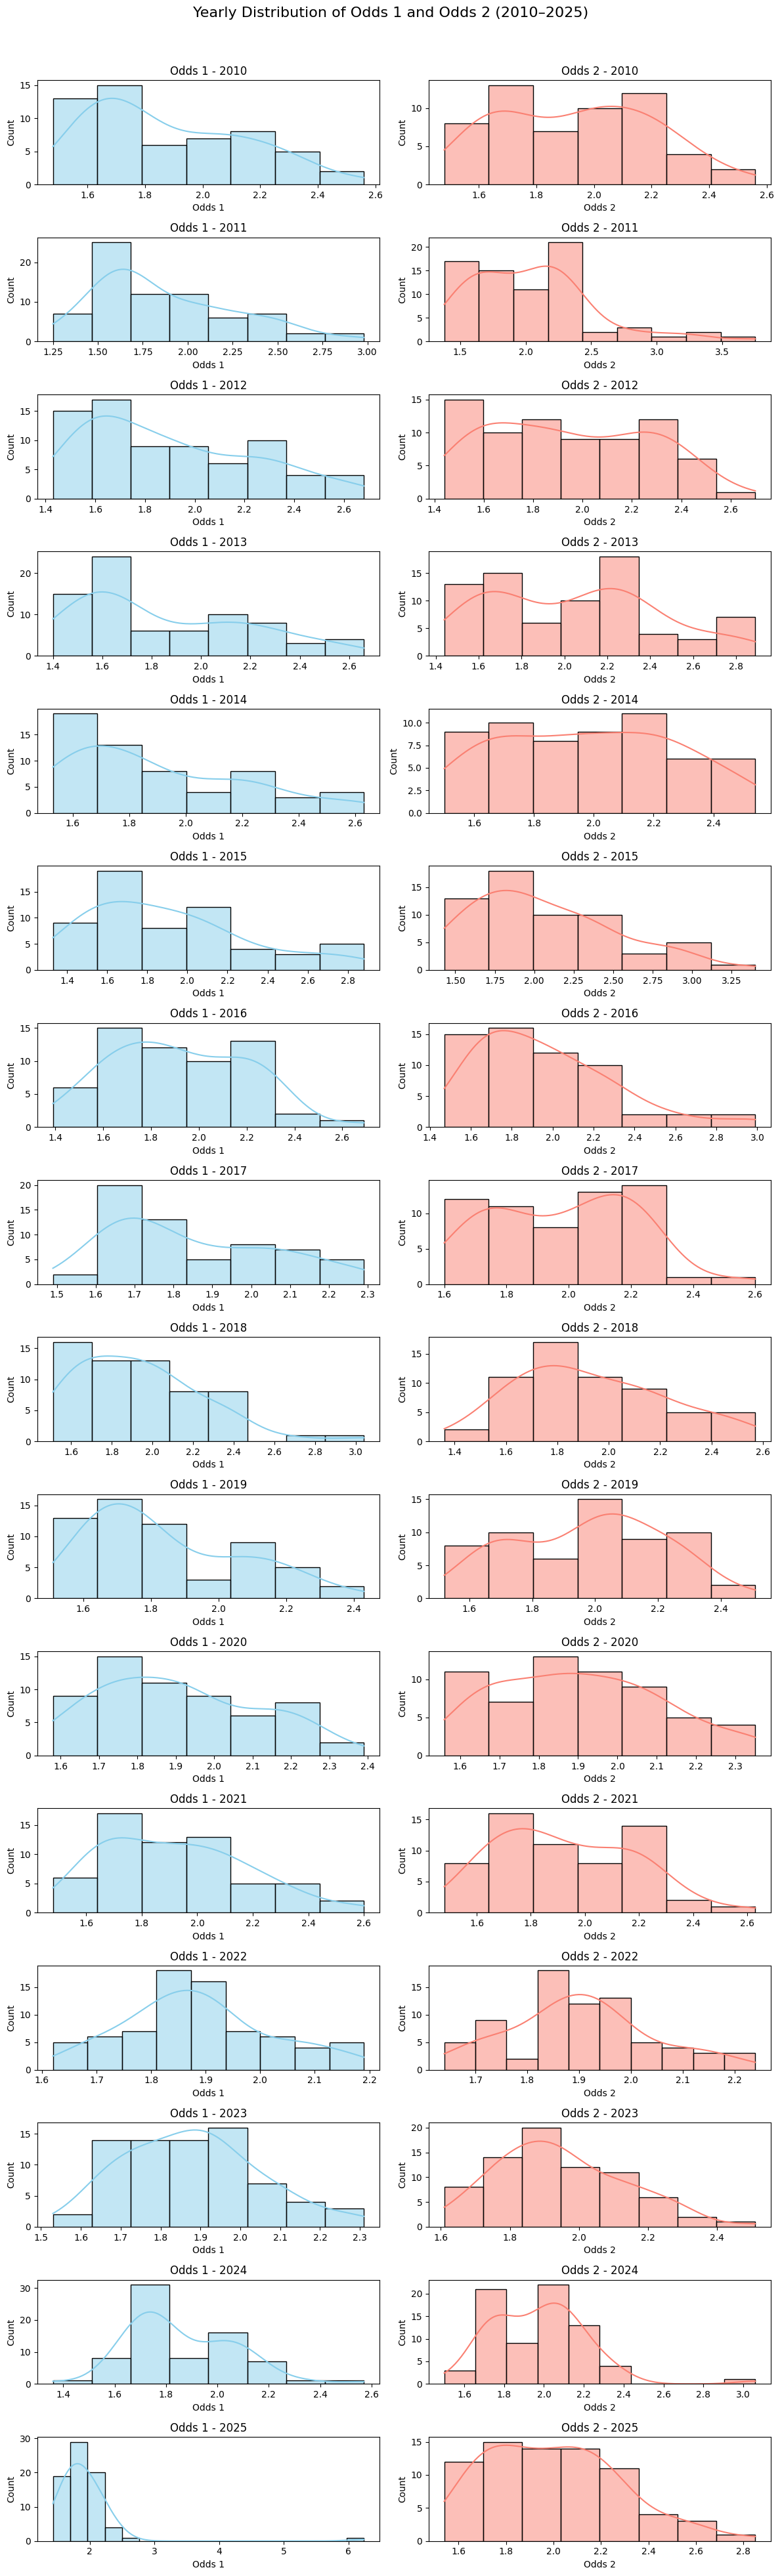

In [156]:
# Ensure numeric types for odds columns
odds_df["Odds 1"] = pd.to_numeric(odds_df["Odds 1"], errors="coerce")
odds_df["Odds 2"] = pd.to_numeric(odds_df["Odds 2"], errors="coerce")

# Drop rows with missing values
odds_df = odds_df.dropna(subset=["Odds 1", "Odds 2", "Year"])

# Get sorted list of years
years = sorted(odds_df["Year"].unique())

# Set up subplots
fig, axes = plt.subplots(len(years), 2, figsize=(12, len(years) * 2.5), constrained_layout=True)
fig.suptitle("Yearly Distribution of Odds 1 and Odds 2 (2010–2025)", fontsize=16)

# Plot distributions
for i, year in enumerate(years):
    year_data = odds_df[odds_df["Year"] == year]
    
    # Odds 1
    sns.histplot(year_data["Odds 1"], kde=True, ax=axes[i, 0], color='skyblue')
    axes[i, 0].set_title(f"Odds 1 - {year}")
    axes[i, 0].set_xlabel("Odds 1")
    
    # Odds 2
    sns.histplot(year_data["Odds 2"], kde=True, ax=axes[i, 1], color='salmon')
    axes[i, 1].set_title(f"Odds 2 - {year}")
    axes[i, 1].set_xlabel("Odds 2")

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

# CHECKING FOR OUTLIERS

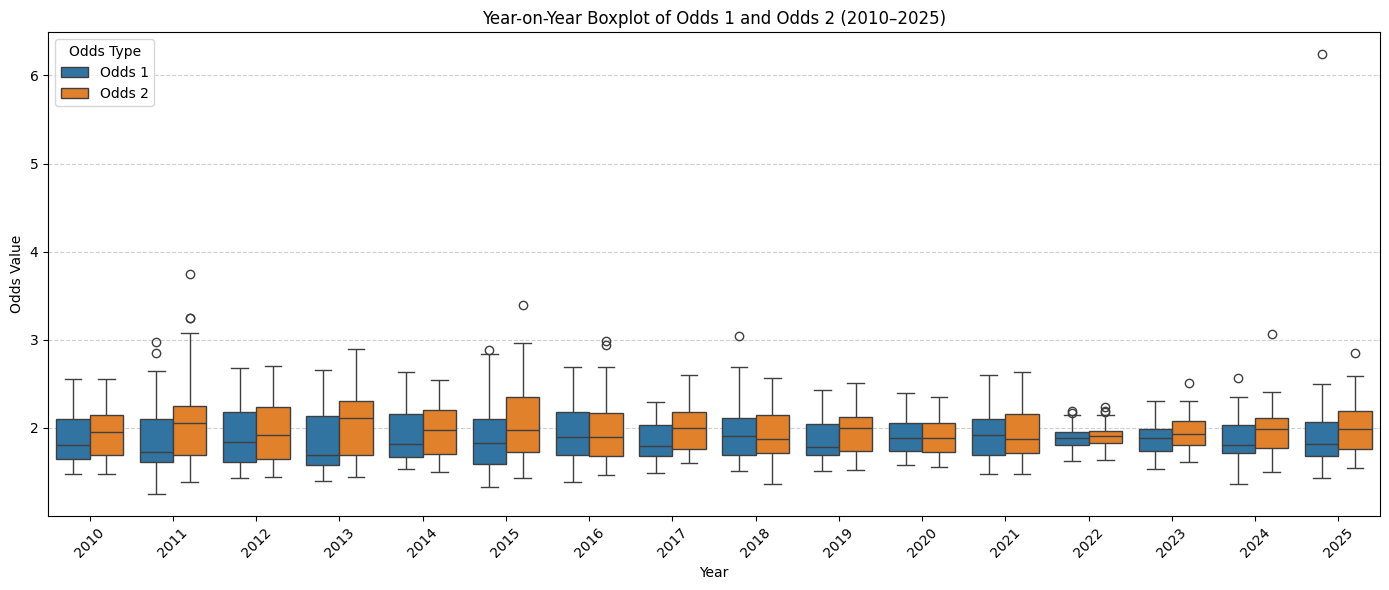

In [157]:
# Ensure odds are numeric
odds_df["Odds 1"] = pd.to_numeric(odds_df["Odds 1"], errors="coerce")
odds_df["Odds 2"] = pd.to_numeric(odds_df["Odds 2"], errors="coerce")

# Drop rows with missing values
odds_df = odds_df.dropna(subset=["Odds 1", "Odds 2", "Year"])

# Reshape the DataFrame for easier plotting with seaborn
melted_df = odds_df.melt(id_vars="Year", value_vars=["Odds 1", "Odds 2"],
                         var_name="Odds Type", value_name="Odds Value")

# Set up the figure
plt.figure(figsize=(14, 6))
sns.boxplot(x="Year", y="Odds Value", hue="Odds Type", data=melted_df)

# Customize the plot
plt.title("Year-on-Year Boxplot of Odds 1 and Odds 2 (2010–2025)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# YEARLY DISTRIBUTION OF ODDS 1 AND ODDS 2 (2010-2025) AFTER REMOVING OUTLIERS 

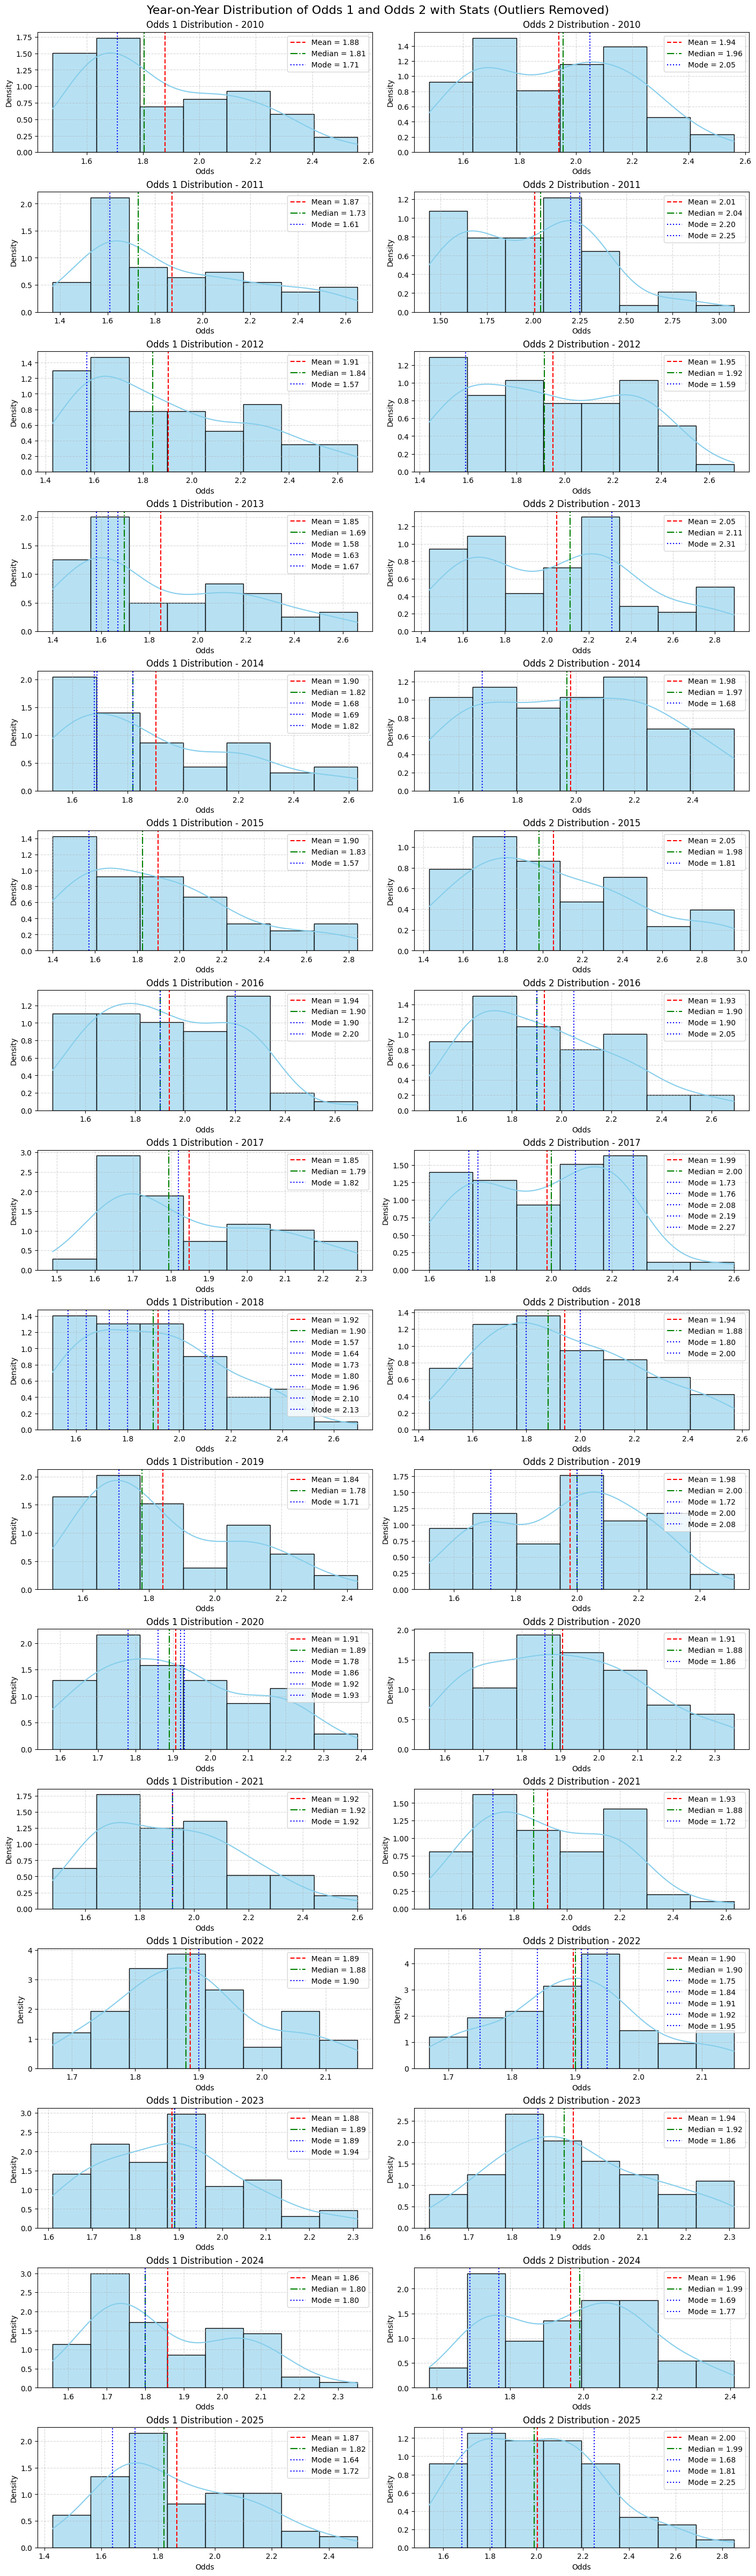

,Year,Odds Type,Mean,Median,Std Dev,Skewness,Kurtosis,Modes
0,2010,Odds 1,1.88,1.81,0.27,0.59,-0.69,[1.71]
1,2010,Odds 2,1.94,1.96,0.27,0.16,-0.95,[2.05]
2,2011,Odds 1,1.87,1.73,0.34,0.65,-0.74,[1.61]
3,2011,Odds 2,2.01,2.04,0.37,0.48,-0.16,"[2.2, 2.25]"
4,2012,Odds 1,1.91,1.84,0.33,0.63,-0.73,[1.57]
5,2012,Odds 2,1.95,1.92,0.33,0.19,-1.12,[1.59]
6,2013,Odds 1,1.85,1.69,0.34,0.61,-0.80,"[1.58, 1.63, 1.67]"
7,2013,Odds 2,2.05,2.11,0.39,0.31,-0.85,[2.31]
8,2014,Odds 1,1.90,1.82,0.31,0.75,-0.47,"[1.68, 1.69, 1.82]"
9,2014,Odds 2,1.98,1.97,0.30,0.08,-1.10,[1.68]


In [158]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

# --- Step 1: Load and clean data ---
odds_df["Odds 1"] = pd.to_numeric(odds_df["Odds 1"], errors="coerce")
odds_df["Odds 2"] = pd.to_numeric(odds_df["Odds 2"], errors="coerce")
odds_df = odds_df.dropna(subset=["Odds 1", "Odds 2", "Year"])

# --- Step 2: Outlier removal function using IQR ---
def remove_outliers_iqr(df, column):
    cleaned = pd.DataFrame()
    for year in df["Year"].unique():
        year_data = df[df["Year"] == year]
        Q1 = year_data[column].quantile(0.25)
        Q3 = year_data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        filtered = year_data[(year_data[column] >= lower_bound) & (year_data[column] <= upper_bound)]
        cleaned = pd.concat([cleaned, filtered], axis=0)
    return cleaned

# --- Step 3: Remove outliers from both Odds 1 and Odds 2 ---
cleaned_odds_df = remove_outliers_iqr(odds_df, "Odds 1")
cleaned_odds_df = remove_outliers_iqr(cleaned_odds_df, "Odds 2")  # filter again for Odds 2

# --- Step 4: Plotting function with stats ---
def plot_distribution_with_stats(data, year, column, ax):
    odds = data[column]
    mean = odds.mean()
    median = odds.median()
    std = odds.std()
    skw = skew(odds)
    kurt = kurtosis(odds)
    modes = odds.mode().tolist()

    # Plot
    sns.histplot(odds, kde=True, ax=ax, color='skyblue', stat='density', edgecolor='black', alpha=0.6)
    ax.axvline(mean, color='red', linestyle='--', label=f'Mean = {mean:.2f}')
    ax.axvline(median, color='green', linestyle='-.', label=f'Median = {median:.2f}')
    for m in modes:
        ax.axvline(m, color='blue', linestyle=':', label=f'Mode = {m:.2f}')
    
    ax.set_title(f"{column} Distribution - {year}")
    ax.set_xlabel("Odds")
    ax.set_ylabel("Density")
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.5)

    return {
        "Year": year,
        "Odds Type": column,
        "Mean": round(mean, 2),
        "Median": round(median, 2),
        "Std Dev": round(std, 2),
        "Skewness": round(skw, 2),
        "Kurtosis": round(kurt, 2),
        "Modes": [round(m, 2) for m in modes]
    }

# --- Step 5: Generate plots and stats ---
years = sorted(cleaned_odds_df["Year"].unique())
fig, axes = plt.subplots(len(years), 2, figsize=(14, len(years) * 3), constrained_layout=True)

stats_summary = []
for i, year in enumerate(years):
    data_year = cleaned_odds_df[cleaned_odds_df["Year"] == year]
    stats_summary.append(plot_distribution_with_stats(data_year, year, "Odds 1", axes[i, 0]))
    stats_summary.append(plot_distribution_with_stats(data_year, year, "Odds 2", axes[i, 1]))

plt.suptitle("Year-on-Year Distribution of Odds 1 and Odds 2 with Stats (Outliers Removed)", fontsize=16)
plt.show()

# --- Step 6: Create and display stats summary ---
stats_df = pd.DataFrame(stats_summary)
display(stats_df)

# If you want the cleaned dataframe as output
cleaned_odds_df.reset_index(drop=True, inplace=True)

# TRENDS OF MEAN , MEDAIN , AND STD DEV ( ODDS 1 AND ODDS 2)

In [159]:
import plotly.graph_objects as go

# Ensure stats_agg is created
stats_agg = stats_df.pivot(index='Year', columns='Odds Type')

# Define metrics
metrics = ["Mean", "Median", "Std Dev"]
titles = {
    "Mean": "Year-on-Year Mean (Odds 1 vs Odds 2)",
    "Median": "Year-on-Year Median (Odds 1 vs Odds 2)",
    "Std Dev": "Year-on-Year Standard Deviation (Odds 1 vs Odds 2)"
}

# Create subplots
from plotly.subplots import make_subplots

fig = make_subplots(rows=3, cols=1, shared_xaxes=True, vertical_spacing=0.1,
                    subplot_titles=[titles[m] for m in metrics])

for i, metric in enumerate(metrics):
    fig.add_trace(go.Scatter(
        x=stats_agg.index,
        y=stats_agg[(metric, "Odds 1")],
        mode='lines+markers',
        name=f'Odds 1 - {metric}',
        marker=dict(color='blue')
    ), row=i+1, col=1)

    fig.add_trace(go.Scatter(
        x=stats_agg.index,
        y=stats_agg[(metric, "Odds 2")],
        mode='lines+markers',
        name=f'Odds 2 - {metric}',
        marker=dict(color='red')
    ), row=i+1, col=1)

fig.update_layout(height=900, width=1000, title_text="Trends of Mean, Median, and Std Dev (Odds 1 vs Odds 2)",
                  showlegend=True)

fig.update_xaxes(title_text="Year", row=3, col=1)
fig.update_yaxes(title_text="Value")

fig.show()

### 📊 Analysis of Year-on-Year Mean and Median Odds

- The **mean** and **median** odds for both `Odds 1` and `Odds 2` remain closely aligned across all years, with only minor deviations.
- Both metrics mostly fall in the range of **1.75 to 2.10**.

### 🔍 Implication in Terms of Probability

- Using the formula for implied win probability:  
  $$
  \text{Win Probability} = \frac{1}{\text{Odds}}
  $$
- This corresponds to:
  - Odds of 1.75 $\Rightarrow$ $\frac{1}{1.75} \approx 57\%$
  - Odds of 2.10 $\Rightarrow$ $\frac{1}{2.10} \approx 48\%$

- This indicates that **each team typically has a win probability between 45% and 60%**.

### 🎯 Conclusion

- The tight alignment of mean and median suggests the distribution of odds is relatively symmetric and balanced.
- This range implies that **no team is heavily favored**, and matches are statistically competitive.
- Therefore, **predicting outcomes based solely on odds is difficult**, as the market views most contests as closely matched.

# YEAR-ON-YEAR BOOKMAKER MARGIN (OVERROUND)

In [160]:
import plotly.graph_objects as go
import pandas as pd

# Step 1: Ensure numeric odds and clean data
odds_df["Odds 1"] = pd.to_numeric(odds_df["Odds 1"], errors="coerce")
odds_df["Odds 2"] = pd.to_numeric(odds_df["Odds 2"], errors="coerce")
odds_df = odds_df.dropna(subset=["Odds 1", "Odds 2", "Year"])

# Step 2: Calculate implied probabilities and margin
odds_df["Implied Prob 1"] = 1 / odds_df["Odds 1"]
odds_df["Implied Prob 2"] = 1 / odds_df["Odds 2"]
odds_df["Margin"] = (odds_df["Implied Prob 1"] + odds_df["Implied Prob 2"]) - 1
odds_df["Margin %"] = odds_df["Margin"] * 100

# Step 3: Summary table
margin_summary = odds_df.groupby("Year")["Margin %"].agg(["mean", "median"]).reset_index()

# Step 4: Plotly chart
fig = go.Figure()

# Mean line
fig.add_trace(go.Scatter(
    x=margin_summary["Year"], y=margin_summary["mean"],
    mode='lines+markers',
    name='Mean Margin %',
    line=dict(color='blue'),
    marker=dict(symbol='circle')
))

# Median line
fig.add_trace(go.Scatter(
    x=margin_summary["Year"], y=margin_summary["median"],
    mode='lines+markers',
    name='Median Margin %',
    line=dict(color='green', dash='dash'),
    marker=dict(symbol='x')
))

# Layout
fig.update_layout(
    title="Year-on-Year Bookmaker Margin (Overround)",
    xaxis_title="Year",
    yaxis_title="Margin (%)",
    template="plotly_white",
    hovermode="x unified",
    height=500,
    width=900
)

fig.show()

### 💰 Year-on-Year Bookmaker Margin (Overround) Analysis

- In the early years (2010–2013), the bookmaker margin was **consistently high**, hovering around **6.7% to 6.8%**.
- From **2014 onward**, there has been a **gradual decline** in the average margin.
- In **recent years (2023–2025)**, the margin has dropped further — consistently **below 6%**, with 2025 reaching as low as **~4.9%**.

### 📊 Practical Implication

This margin information helps us estimate **how much we might lose** when betting on both teams using the early six strategy.

If the **six-hit condition is not met** (i.e., no team hits a six in the first two overs), then:

- The bet does **not qualify** for the bonus.
- It's treated like a normal bet without any insurance.
- In this case, the **only loss** is the bookmaker’s margin — usually around **5% to 6%** of what you bet.

But if the **six-hit condition is met** (the team hits a six early):

- The insurance kicks in, and your bet is treated as a **winner**, even if the team loses.
- This increases your chance of making a **profit** over time.

So, knowing the bookmaker margin helps you understand your risk — especially when the betting strategy depends on special conditions like this one.

---

### 🧮 How Margin Is Calculated

Bookmakers set odds in a way that the implied probabilities add up to more than 100%.

Given two outcomes (like in a cricket match), the **implied probability** for each is:

$$
\text{Implied Probability} = \frac{1}{\text{Odds}}
$$

So, the **bookmaker margin** is calculated as:

$$
\text{Margin} = \left( \frac{1}{\text{Odds}_1} + \frac{1}{\text{Odds}_2} \right) - 1
$$

To express it as a percentage:

$$
\text{Margin \%} = \left( \frac{1}{\text{Odds}_1} + \frac{1}{\text{Odds}_2} - 1 \right) \times 100
$$

This represents the **built-in profit** the bookmaker earns on every match, regardless of outcome.

# six_hit_strategy

# LOAD DATASET

In [161]:
import pandas as pd

# Load ball-by-ball data
deliveries_2008_2024 = pd.read_csv("data/deliveries_2008_to_2024.csv")
deliveries_2025 = pd.read_csv("data/deliveries.csv")

# Load match summary data
matches_2008_2024 = pd.read_csv("data/matches_2008_2024.csv")
matches_2025 = pd.read_csv("data/matches.csv")


In [162]:
# Display datasets
print("deliveries_2008_2024")
display(deliveries_2008_2024.head())

print("deliveries_2025")
display(deliveries_2025.head())

print("matches_2008_2024")
display(matches_2008_2024.head())

print("matches_2025")
display(matches_2025.head())

deliveries_2008_2024


,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


deliveries_2025


,match_no,date,stage,venue,batting_team,bowling_team,innings,over,striker,bowler,runs_of_bat,extras,wide,legbyes,byes,noballs,wicket_type,player_dismissed,fielder
0,1,"Mar 22, 2025",League stage,"Eden Gardens, Kolkata",KKR,RCB,1,0.1,de Kock,Hazlewood,0,0,0,0,0,0,NaN,NaN,NaN
1,1,"Mar 22, 2025",League stage,"Eden Gardens, Kolkata",KKR,RCB,1,0.2,de Kock,Hazlewood,4,0,0,0,0,0,NaN,NaN,NaN
2,1,"Mar 22, 2025",League stage,"Eden Gardens, Kolkata",KKR,RCB,1,0.3,de Kock,Hazlewood,0,0,0,0,0,0,NaN,NaN,NaN
3,1,"Mar 22, 2025",League stage,"Eden Gardens, Kolkata",KKR,RCB,1,0.4,de Kock,Hazlewood,0,0,0,0,0,0,NaN,NaN,NaN
4,1,"Mar 22, 2025",League stage,"Eden Gardens, Kolkata",KKR,RCB,1,0.5,de Kock,Hazlewood,0,0,0,0,0,0,caught,de Kock,Jitesh Sharma


matches_2008_2024


,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


matches_2025


,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,...,match_result,match_winner,wb_runs,wb_wickets,balls_left,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 22,2025","Eden Gardens, Kolkata",KKR,RCB,League,RCB,Bowl,174.0,8.0,...,completed,RCB,NaN,7,22.0,Krunal Pandya,Virat Kohli,59.0,Krunal Pandya,3--29
1,2,"March 23,2025","Rajiv Gandhi International Stadium, Hyderabad",SRH,RR,League,RR,Bowl,286.0,6.0,...,completed,SRH,44,NaN,0.0,Ishan Kishan,Ishan Kishan,106.0,Tushar Deshpande,3--44
2,3,"March 23,2025","MA Chidambaram Stadium, Chennai",CSK,MI,League,CSK,Bowl,155.0,9.0,...,completed,CSK,NaN,4,5.0,Noor Ahmad,Rachin Ravindra,65.0,Noor Ahmad,4--18
3,4,"March 24,2025","ACA-VDCA Cricket Stadium, Vishakhapatnam",DC,LSG,League,DC,Bowl,209.0,8.0,...,completed,DC,NaN,1,3.0,Ashutosh Sharma,Nicholas Pooran,75.0,Mitchell Starc,3--42
4,5,"March 25,2025","Narendra Modi Stadium, Ahmedabad",GT,PBKS,League,GT,Bowl,243.0,5.0,...,completed,PBKS,11,NaN,0.0,Shreyas Iyer,Shreyas Iyer,97.0,Sai Kishore,3--30


In [163]:
# View dataset structure using .info()

print("deliveries_2008_2024")
deliveries_2008_2024.info()
print("\n" + "-"*50 + "\n")

print("deliveries_2025")
deliveries_2025.info()
print("\n" + "-"*50 + "\n")

print("matches_2008_2024")
matches_2008_2024.info()
print("\n" + "-"*50 + "\n")

print("matches_2025")
matches_2025.info()

deliveries_2008_2024
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder          

In [164]:
# View summary statistics using .describe()

print("deliveries_2008_2024")
print(deliveries_2008_2024.describe())
print("\n" + "-"*50 + "\n")

print("deliveries_2025")
print(deliveries_2025.describe())
print("\n" + "-"*50 + "\n")

print("matches_2008_2024")
print(matches_2008_2024.describe())
print("\n" + "-"*50 + "\n")

print("matches_2025")
print(matches_2025.describe())

deliveries_2008_2024
           match_id         inning           over           ball  \
count  2.609200e+05  260920.000000  260920.000000  260920.000000   
mean   9.070665e+05       1.483531       9.197677       3.624486   
std    3.679913e+05       0.502643       5.683484       1.814920   
min    3.359820e+05       1.000000       0.000000       1.000000   
25%    5.483340e+05       1.000000       4.000000       2.000000   
50%    9.809670e+05       1.000000       9.000000       4.000000   
75%    1.254066e+06       2.000000      14.000000       5.000000   
max    1.426312e+06       6.000000      19.000000      11.000000   

        batsman_runs     extra_runs     total_runs      is_wicket  
count  260920.000000  260920.000000  260920.000000  260920.000000  
mean        1.265001       0.067806       1.332807       0.049632  
std         1.639298       0.343265       1.626416       0.217184  
min         0.000000       0.000000       0.000000       0.000000  
25%         0.000000      

# EXTRACTING RELEVANT COLUMNS FOR ANALYSIS



In [165]:
# Deliveries 2008–2024: rename columns and select needed ones
deliveries_2008_2024_clean = deliveries_2008_2024.rename(columns={
    "match_id": "match_no",
    "batsman_runs": "runs_of_bat"
})[["match_no", "batting_team", "over", "runs_of_bat"]]

# Deliveries 2025: columns already aligned with our needs
deliveries_2025_clean = deliveries_2025[["match_no", "batting_team", "over", "runs_of_bat"]]

# Matches 2008–2024: rename and select
matches_2008_2024_clean = matches_2008_2024.rename(columns={
    "id": "match_no"
})[["match_no", "team1", "team2", "winner", "season"]]

# Matches 2025: rename and select
matches_2025_clean = matches_2025.rename(columns={
    "match_id": "match_no",
    "match_winner": "winner"
})
matches_2025_clean["season"] = 2025
matches_2025_clean = matches_2025_clean[["match_no", "team1", "team2", "winner", "season"]]

In [166]:
from IPython.display import display

# Display head of cleaned deliveries datasets
print("deliveries_2008_2024_clean")
display(deliveries_2008_2024_clean.head())

print("deliveries_2025_clean")
display(deliveries_2025_clean.head())

# Display head of cleaned matches datasets
print("matches_2008_2024_clean")
display(matches_2008_2024_clean.head())

print("matches_2025_clean")
display(matches_2025_clean.head())

deliveries_2008_2024_clean


,match_no,batting_team,over,runs_of_bat
0,335982,Kolkata Knight Riders,0,0
1,335982,Kolkata Knight Riders,0,0
2,335982,Kolkata Knight Riders,0,0
3,335982,Kolkata Knight Riders,0,0
4,335982,Kolkata Knight Riders,0,0


deliveries_2025_clean


,match_no,batting_team,over,runs_of_bat
0,1,KKR,0.1,0
1,1,KKR,0.2,4
2,1,KKR,0.3,0
3,1,KKR,0.4,0
4,1,KKR,0.5,0


matches_2008_2024_clean


,match_no,team1,team2,winner,season
0,335982,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,2007/08
1,335983,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,2007/08
2,335984,Delhi Daredevils,Rajasthan Royals,Delhi Daredevils,2007/08
3,335985,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,2007/08
4,335986,Kolkata Knight Riders,Deccan Chargers,Kolkata Knight Riders,2007/08


matches_2025_clean


,match_no,team1,team2,winner,season
0,1,KKR,RCB,RCB,2025
1,2,SRH,RR,SRH,2025
2,3,CSK,MI,CSK,2025
3,4,DC,LSG,DC,2025
4,5,GT,PBKS,PBKS,2025


# MERGING BOTH 2025 AND 2008 TO 2024 DATASET (DELIVERIES AND MATCHES)

In [167]:
# Merge deliveries datasets
deliveries_df = pd.concat([deliveries_2008_2024_clean, deliveries_2025_clean], ignore_index=True)

# Merge matches datasets
matches_df = pd.concat([matches_2008_2024_clean, matches_2025_clean], ignore_index=True)

# Confirm merge
print("Combined deliveries_df:")
display(deliveries_df.head())

print("Combined matches_df:")
display(matches_df.head())

# Check shapes
print("deliveries_df shape:", deliveries_df.shape)
print("matches_df shape:", matches_df.shape)

Combined deliveries_df:


,match_no,batting_team,over,runs_of_bat
0,335982,Kolkata Knight Riders,0.0,0
1,335982,Kolkata Knight Riders,0.0,0
2,335982,Kolkata Knight Riders,0.0,0
3,335982,Kolkata Knight Riders,0.0,0
4,335982,Kolkata Knight Riders,0.0,0


Combined matches_df:


,match_no,team1,team2,winner,season
0,335982,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,2007/08
1,335983,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,2007/08
2,335984,Delhi Daredevils,Rajasthan Royals,Delhi Daredevils,2007/08
3,335985,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,2007/08
4,335986,Kolkata Knight Riders,Deccan Chargers,Kolkata Knight Riders,2007/08


deliveries_df shape: (278103, 4)
matches_df shape: (1169, 5)


In [168]:
matches_df["season"].unique()

array(['2007/08', '2009', '2009/10', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', '2020/21', '2021', '2022',
       '2023', '2024', 2025], dtype=object)

In [169]:
# Ensure season column is string
matches_df["season"] = matches_df["season"].astype(str)

# Extract only the starting 4-digit year (e.g., from "2007/08" → "2007")
matches_df["season"] = matches_df["season"].str.extract(r"(\d{4})")

# Convert to integer
matches_df["season"] = matches_df["season"].astype(int)

In [170]:
matches_df["season"].unique()

array([2007, 2009, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
       2020, 2021, 2022, 2023, 2024, 2025])

# MERGING MATHCES AND DELIVERIES  DATASET (FIRST TWO OVERS)

In [171]:
# Step 1: Filter deliveries to first two overs
early_overs_df = deliveries_df[deliveries_df["over"] < 2].copy()

# Step 2: Create a flag for whether a six was hit
early_overs_df["six_hit"] = early_overs_df["runs_of_bat"] == 6

# Step 3: Get whether each team hit a six in each match
six_flags = early_overs_df.groupby(["match_no", "batting_team"])["six_hit"].any().reset_index()
six_flags["six_hit"] = six_flags["six_hit"].astype(int)

# Step 4: Rename 'season' to 'year' in matches for consistency
matches_df = matches_df.rename(columns={"season": "year"})

# Step 5: Merge six info with match summary
six_analysis_df = six_flags.merge(matches_df, on="match_no", how="left")

# Step 6: Identify if the team that hit six also won or lost
six_analysis_df["team_won"] = six_analysis_df["batting_team"] == six_analysis_df["winner"]
six_analysis_df["team_lost"] = (six_analysis_df["six_hit"] == 1) & (~six_analysis_df["team_won"])

# View the result
display(six_analysis_df)

,match_no,batting_team,six_hit,team1,team2,winner,year,team_won,team_lost
0,1,KKR,0,KKR,RCB,RCB,2025,False,False
1,1,RCB,0,KKR,RCB,RCB,2025,True,False
2,2,RR,1,SRH,RR,SRH,2025,False,True
3,2,SRH,1,SRH,RR,SRH,2025,True,False
4,3,CSK,0,CSK,MI,CSK,2025,True,False
...,...,...,...,...,...,...,...,...,...
2327,1426310,Royal Challengers Bengaluru,1,Royal Challengers Bengaluru,Rajasthan Royals,Rajasthan Royals,2024,False,True
2328,1426311,Rajasthan Royals,1,Sunrisers Hyderabad,Rajasthan Royals,Sunrisers Hyderabad,2024,False,True
2329,1426311,Sunrisers Hyderabad,1,Sunrisers Hyderabad,Rajasthan Royals,Sunrisers Hyderabad,2024,True,False
2330,1426312,Kolkata Knight Riders,1,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,2024,True,False


In [172]:
six_analysis_df.isnull().sum()

match_no         0
batting_team     0
six_hit          0
team1            0
team2            0
winner          10
year             0
team_won         0
team_lost        0
dtype: int64

In [173]:
# Drop rows where winner is null
six_analysis_df = six_analysis_df.dropna(subset=["winner"]).copy()

# Confirm the change
print("Remaining rows in six_analysis_df after dropping null winners:", six_analysis_df.shape[0])
display(six_analysis_df.head())

Remaining rows in six_analysis_df after dropping null winners: 2322


,match_no,batting_team,six_hit,team1,team2,winner,year,team_won,team_lost
0,1,KKR,0,KKR,RCB,RCB,2025,False,False
1,1,RCB,0,KKR,RCB,RCB,2025,True,False
2,2,RR,1,SRH,RR,SRH,2025,False,True
3,2,SRH,1,SRH,RR,SRH,2025,True,False
4,3,CSK,0,CSK,MI,CSK,2025,True,False


# IPL FIRST 2OVERS - SIX HITTING TRENDS (2008 - 2025)

In [180]:
import pandas as pd
import plotly.graph_objects as go

# Step 1: Ensure `year` is clean integer type
six_analysis_df["year"] = pd.to_numeric(six_analysis_df["year"], errors="coerce")
six_analysis_df = six_analysis_df.dropna(subset=["year"])
six_analysis_df["year"] = six_analysis_df["year"].astype(int)

# Step 2: Matches where at least one team hit a six
match_with_six_flag = six_analysis_df.groupby(["match_no", "year"])["six_hit"].sum().reset_index()
match_with_six_flag["six_hit_flag"] = (match_with_six_flag["six_hit"] >= 1).astype(int)
one_or_more_teams_hit_six_per_year = match_with_six_flag.groupby("year")["six_hit_flag"].sum()

# Step 3: Matches where both teams hit a six
match_six_counts = six_analysis_df.groupby(["match_no", "year"])["six_hit"].sum().reset_index()
both_teams_six_per_year = match_six_counts[match_six_counts["six_hit"] == 2].groupby("year")["match_no"].count()

# Step 4: Matches where one team hit a six and lost
loss_six_counts = six_analysis_df.groupby(["match_no", "year"])["team_lost"].sum().reset_index()
one_team_lost_hit_six_per_year = loss_six_counts[loss_six_counts["team_lost"] == 1].groupby("year")["match_no"].count()

# Step 5: Total matches per year
total_matches_per_year = match_with_six_flag.groupby("year")["match_no"].count()

# Step 6: Prepare percentage data
line_data = pd.DataFrame({
    "year": total_matches_per_year.index,
    "pct_teams_hit_six": one_or_more_teams_hit_six_per_year / total_matches_per_year,
    "pct_both_teams_hit_six": both_teams_six_per_year / total_matches_per_year,
    "pct_one_team_hit_and_lost": one_team_lost_hit_six_per_year / total_matches_per_year
}).fillna(0).reset_index(drop=True)

# Step 7: Fill missing years
all_years = list(range(line_data["year"].min(), line_data["year"].max() + 1))
line_data = line_data.set_index("year").reindex(all_years, fill_value=0).reset_index().rename(columns={"index": "year"})

# Step 8: Plotly chart with all x-axis ticks
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=line_data["year"], y=line_data["pct_teams_hit_six"],
    mode='lines+markers', name="Either Team Hit Six",
    marker=dict(symbol='circle'), line=dict(color="blue")
))

fig.add_trace(go.Scatter(
    x=line_data["year"], y=line_data["pct_one_team_hit_and_lost"],
    mode='lines+markers', name="One Team Hit Six & Lost",
    marker=dict(symbol='x'), line=dict(color="red")
))

fig.add_trace(go.Scatter(
    x=line_data["year"], y=line_data["pct_both_teams_hit_six"],
    mode='lines+markers', name="Both Teams Hit Six",
    marker=dict(symbol='square'), line=dict(color="green", dash='dash')
))

fig.update_layout(
    title="IPL First 2 Overs – Six Hitting Trends (2008–2025)",
    xaxis_title="Year",
    yaxis_title="Proportion",
    xaxis=dict(
        tickmode='array',
        tickvals=all_years,
        ticktext=[str(year) for year in all_years]
    ),
    template="plotly_white",
    hovermode="x unified",
    width=1500,
    height=550
)

fig.show()

### 📈 Observations on Six Hitting Trends in the First 2 Overs (2008–2025)

From the graph above, we can clearly observe that **six hitting trends in the first two overs have been increasing steadily from 2020 to 2025**. For now, we focus only on the strategies involving promo-based payouts — ignoring "either team hits a six" for simplicity.

Key observations:

- 🔴 **One Team Hit a Six and Lost**: This has grown consistently over the years, showing strong potential for early-six promotional strategies.
- 🟢 **Both Teams Hit a Six**: Although less common, even this metric has risen, especially in the last two seasons.

The years **2024 and 2025** in particular show a **notable spike**, likely due to aggressive powerplay batting or weakened early bowling lineups. This supports the use of event-triggered betting strategies like the early six promo.

---

### 💡 Long-Term Earnings Potential from the Strategy

We now estimate how much profit could be earned using **Stake.com's Early Six** promotional offer.

---

#### ⚙️ Strategy Setup:

- We assume bets are placed on both teams using **two separate accounts**, with stakes proportioned to yield the **maximum promo payout** of $25 (₹2000).
- If our **six-hit strategy condition is met**, we win from **both sides**:
  - One from the match result (team wins),
  - One from the promo (team loses but hits a six early).
- The **return is ₹1800 per side**, totalling ₹3600 in winnings.

> ⚠️ Technically, ₹1800 is ₹2000 minus the bookmaker margin of 6% (₹120). So the actual return is ₹1880. However, for simplicity, we use **₹1800** in these calculations, neglecting the ₹80 to keep the math conservative.

- If the six-hit condition is **not met**, we lose just the **bookmaker margin**, i.e., ₹120 on a ₹2000 total stake.

---

### 🧮 Formula for Expected Return

For a given six-hit probability $p$, the expected return is:

$$
EV = p \times 1800 + (1 - p) \times (-120)
$$

This tells us how much profit we can expect, on average, for each match.

---

### 🔢 Scenario 1: Using Mean (2020–2025)

#### 📌 One Team Hit Six and Lost

$$
EV = 0.2025 \times 1800 + (1 - 0.2025) \times (-120) = ₹260.45
$$

$$
\text{Total Profit} = 74 \times 260.45 = ₹19,271
$$

#### 📌 Both Teams Hit a Six

$$
EV = 0.0683 \times 1800 + (1 - 0.0683) \times (-120) = ₹93.44
$$

$$
\text{Total Profit} = 74 \times 93.44 = ₹6,914
$$

| Condition                       | Mean (%) | Expected Profit per Match | Total Profit (74 Matches) |
|--------------------------------|----------|----------------------------|----------------------------|
| One Team Hit Six and Lost      | 20.25%   | ₹ 260.45                   | ₹ 19,271                   |
| Both Teams Hit a Six           |  6.83%   | ₹ 93.44                    | ₹  6,914                   |

---

### 🔢 Scenario 2: Using Mean (2024–2025)

#### 📌 One Team Hit Six and Lost

$$
EV = 0.3042 \times 1800 + (1 - 0.3042) \times (-120) = ₹471.39
$$

$$
\text{Total Profit} = 74 \times 471.39 = ₹34,882
$$

#### 📌 Both Teams Hit a Six

$$
EV = 0.1273 \times 1800 + (1 - 0.1273) \times (-120) = ₹174.87
$$

$$
\text{Total Profit} = 74 \times 174.87 = ₹12,940
$$

| Condition                       | Mean (%) | Expected Profit per Match | Total Profit (74 Matches) |
|--------------------------------|----------|----------------------------|----------------------------|
| One Team Hit Six and Lost      | 30.42%   | ₹ 471.39                   | ₹ 34,882                   |
| Both Teams Hit a Six           | 12.73%   | ₹ 174.87                   | ₹ 12,940                   |

---

### ✅ Conclusion

The six-hitting metrics have steadily increased from **2020 to 2025**, with a sharp rise in **2024 and 2025**. This validates the use of early-over-based betting strategies.

By betting on **both teams using two separate accounts**:
- If the six-hit strategy condition is **not met**, the **maximum loss is only ₹120 per match** (6% margin).
- But if the condition **is met**, you collect **₹3600 in winnings** — yielding a high return on a small risk.

With increasing six-hit probabilities and a capped downside, this approach offers a **profitable, low-risk long-term betting strategy** when used with data-driven filters and disciplined bankroll management.